In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **1.a Loading and Preprocessing the Fashion MNIST Dataset**

In [ ]:
# Load the train and test data from CSV files
train_data = pd.read_csv("/content/fashion-mnist_train.csv")
test_data = pd.read_csv("/content/fashion-mnist_test.csv")

# Separate features and labels
X_train = train_data.drop("label", axis=1).values
y_train = train_data["label"].values
X_test = test_data.drop("label", axis=1).values
y_test = test_data["label"].values

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")


Training data shape: (60000, 784)
Test data shape: (10000, 784)


# **1.b Loading and Preprocessing the Fashion MNIST Dataset**

In [ ]:
import struct

def load_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

# Load data from IDX files
X_train = load_idx("/content/train-images-idx3-ubyte").reshape(-1, 784)
y_train = load_idx("/content/train-labels-idx1-ubyte")
X_test = load_idx("/content/t10k-images-idx3-ubyte").reshape(-1, 784)
y_test = load_idx("/content/t10k-labels-idx1-ubyte")

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")


Training data shape: (60000, 784)
Test data shape: (10000, 784)


# **2. Batch Gradient Descent**

Theta after Batch Gradient Descent: [ 3.05044816e+14  2.98301786e+15 -1.57451583e+16 -3.30952497e+15
  1.17692954e+16]


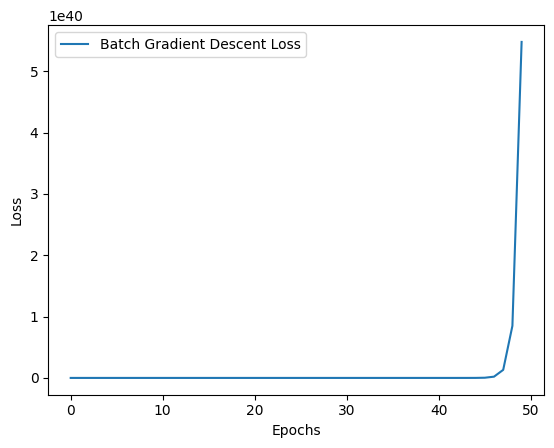

In [ ]:
def batch_gradient_descent(X, y, lr=0.01, epochs=100):
    m, n = X.shape
    theta = np.zeros(n)
    losses = []
    for epoch in range(epochs):
        gradient = (2 / m) * X.T.dot(X.dot(theta) - y)
        theta -= lr * gradient
        loss = np.mean((X.dot(theta) - y) ** 2)
        losses.append(loss)
    return theta, losses

theta_batch, losses_batch = batch_gradient_descent(X_train_scaled[:1000], y_train[:1000], lr=0.01, epochs=50)
print("Theta after Batch Gradient Descent:", theta_batch[:5])

# Plot the loss
plt.plot(losses_batch, label='Batch Gradient Descent Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **3. Stochastic Gradient Descent (SGD)**

<ipython-input-7-690c26fe4547>:10: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * xi.T.dot(xi.dot(theta) - yi)


Theta after SGD: [nan nan nan nan nan]


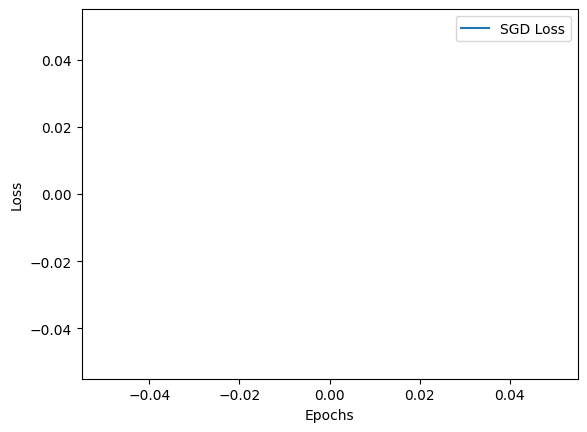

In [ ]:
def stochastic_gradient_descent(X, y, lr=0.01, epochs=100):
    m, n = X.shape
    theta = np.zeros(n)
    losses = []
    for epoch in range(epochs):
        for i in range(m):
            rand_index = np.random.randint(m)
            xi = X[rand_index:rand_index+1]
            yi = y[rand_index:rand_index+1]
            gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradient
        loss = np.mean((X.dot(theta) - y) ** 2)
        losses.append(loss)
    return theta, losses

theta_sgd, losses_sgd = stochastic_gradient_descent(X_train_scaled[:1000], y_train[:1000], lr=0.01, epochs=50)
print("Theta after SGD:", theta_sgd[:5])

# Plot the loss
plt.plot(losses_sgd, label='SGD Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **4. Mini-batch Gradient Descent**

<ipython-input-8-8beeda9dbf82>:13: RuntimeWarning: overflow encountered in square
  loss = np.mean((X.dot(theta) - y) ** 2)


Theta after Mini-batch Gradient Descent: [nan nan nan nan nan]


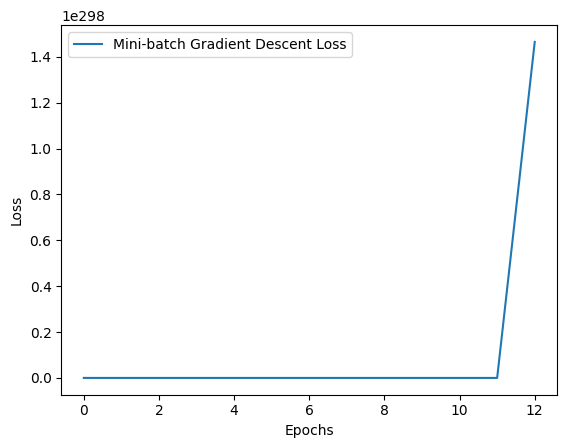

In [ ]:
def mini_batch_gradient_descent(X, y, lr=0.01, epochs=100, batch_size=32):
    m, n = X.shape
    theta = np.zeros(n)
    losses = []
    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled, y_shuffled = X[indices], y[indices]
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradient = (2 / batch_size) * xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradient
        loss = np.mean((X.dot(theta) - y) ** 2)
        losses.append(loss)
    return theta, losses

theta_mini_batch, losses_mini_batch = mini_batch_gradient_descent(X_train_scaled[:1000], y_train[:1000], lr=0.01, epochs=50, batch_size=32)
print("Theta after Mini-batch Gradient Descent:", theta_mini_batch[:5])

# Plot the loss
plt.plot(losses_mini_batch, label='Mini-batch Gradient Descent Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **5. Adam Optimizer**

Theta after Adam Optimizer: [-37.76408646  -0.46171183   0.20292532   0.11998628  -0.50293373]


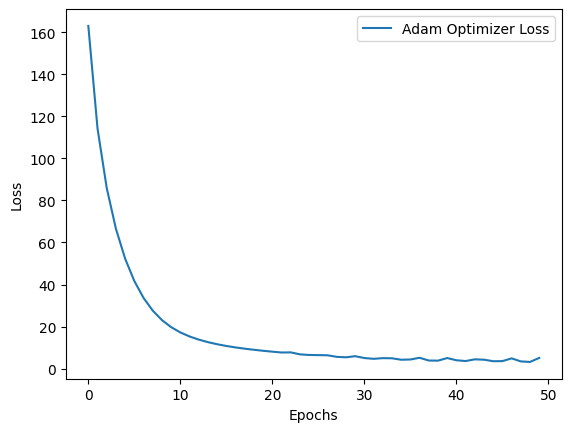

In [ ]:
def adam_optimizer(X, y, lr=0.01, epochs=100, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m, n = X.shape
    theta = np.zeros(n)
    m_t, v_t = np.zeros(n), np.zeros(n)
    losses = []
    for epoch in range(epochs):
        for i in range(m):
            gradient = 2 * X[i:i+1].T.dot(X[i:i+1].dot(theta) - y[i:i+1])
            m_t = beta1 * m_t + (1 - beta1) * gradient
            v_t = beta2 * v_t + (1 - beta2) * (gradient ** 2)
            m_hat = m_t / (1 - beta1 ** (epoch + 1))
            v_hat = v_t / (1 - beta2 ** (epoch + 1))
            theta -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        loss = np.mean((X.dot(theta) - y) ** 2)
        losses.append(loss)
    return theta, losses

theta_adam, losses_adam = adam_optimizer(X_train_scaled[:1000], y_train[:1000], lr=0.01, epochs=50)
print("Theta after Adam Optimizer:", theta_adam[:5])

# Plot the loss
plt.plot(losses_adam, label='Adam Optimizer Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **6. 3D Visualization of Fashion MNIST Data**

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled[:1000])  # Using first 1000 samples for visualization

# Create a DataFrame for easier plotting with Plotly
df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2', 'PC3'])
df['Label'] = y_train[:1000]

# Create the 3D scatter plot
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='Label',
                    title='Interactive 3D PCA Projection of Fashion MNIST',
                    labels={'PC1': 'Principal Component 1',
                            'PC2': 'Principal Component 2',
                            'PC3': 'Principal Component 3'},
                    color_continuous_scale='Viridis')

# Show the interactive plot
fig.show()


# **6.b Loading and Preprocessing the Fashion MNIST Dataset**



In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from PIL import Image
import plotly.express as px

# Assuming X_train_scaled has image data and y_train labels

# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled[:1000])

# Generate figure with 2D scatter plot
fig = go.Figure()

# Loop through each sample and add a small image to the plot
for i in range(1000):
    # Get image (reshape and scale if necessary)
    img_array = X_train_scaled[i].reshape(28, 28)  # Example for 28x28 images
    img = Image.fromarray((img_array * 255).astype(np.uint8))

    # Create an encoded image to use as a custom Plotly marker
    fig.add_trace(go.Scatter(
        x=[X_train_pca[i, 0]], y=[X_train_pca[i, 1]],
        mode='markers+text',
        text='<img src="data:image/png;base64,{}">'.format(img),
        hoverinfo='text',
        textposition='bottom center'
    ))

fig.update_layout(
    title="Scatter Matrix of Images Forming a Shape",
    xaxis_title="PC1",
    yaxis_title="PC2",
)
fig.show()
